<a href="https://colab.research.google.com/github/Barky/Churned-Bank-Customers-Prediction/blob/main/bank_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [471]:
df=pd.read_csv("/content/BankChurners.csv")

In [472]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991


**First I will Make the Columns More Visible**

In [473]:

new_columns = ["No", "Attrition", "Age", "Gender", "Dependent_Count", "Education", 
              "Status", "Income", 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive', 'Contacts_Count', 
             'Credit_Limit', 'Total_Revolving_Bal','Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
             'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Naive_Bayes_1','Naive_Bayes_2']
df.columns = new_columns


**We dont have any null values to take care of, thats a good sign**

In [474]:
df.isnull().sum()

No                          0
Attrition                   0
Age                         0
Gender                      0
Dependent_Count             0
Education                   0
Status                      0
Income                      0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive             0
Contacts_Count              0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
Naive_Bayes_1               0
Naive_Bayes_2               0
dtype: int64

**After that, obviously we want to see how many of our customers churned or not**

In [475]:
#Attrited Customer means he/she is churned
df["Attrition"].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [476]:
normal = df["Attrition"].value_counts(0)[0]
churned = df["Attrition"].value_counts(0)[1]
normal_perc = df["Attrition"].value_counts(1)[0] * 100
churned_perc = df["Attrition"].value_counts(1)[1] * 100

print("there are {} non-churn with percentage of %{:.3f} ".format(normal, normal_perc))
print("there are {} churned with percentage of %{:.3f} ".format(churned, churned_perc))

there are 8500 non-churn with percentage of %83.934 
there are 1627 churned with percentage of %16.066 


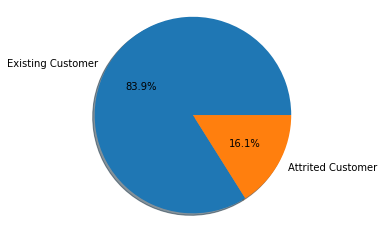

In [477]:

labels = ['Existing Customer', 'Attrited Customer']
sizes = [normal, churned]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

**removing naive bayes columns because we do not need them**

In [478]:

df = df.drop(["Naive_Bayes_1", "Naive_Bayes_2"], axis = 1)

**Lets Visualize our Datas with Churned Customers and Check Correlations before further Cleaning**

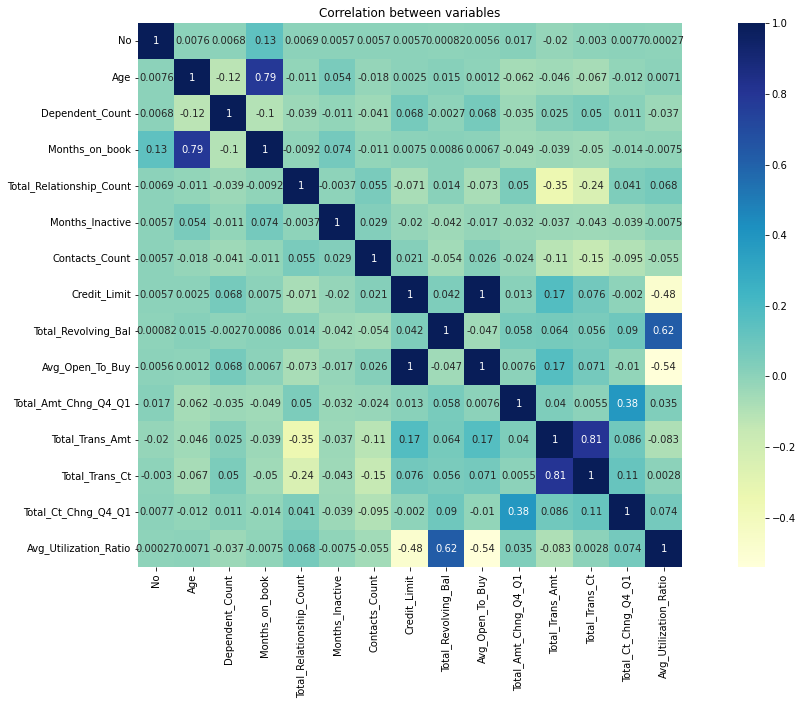

In [479]:
plt.subplots(figsize=(20,10))
plt.title('Correlation between variables')
sns.heatmap(df.corr(),annot=True,square=True,cmap='YlGnBu')

In [480]:
a = df.copy()
a["Attrition"].replace({"Existing Customer":0, "Attrited Customer" : 1}, inplace=True)


a_corr = a.corr()["Attrition"].sort_values(ascending=False).to_frame()
a_corr.style.background_gradient(cmap=sns.color_palette('YlGnBu', as_cmap=True))

,Attrition
Attrition,1.000000
Contacts_Count,0.204491
Months_Inactive,0.152449
Dependent_Count,0.018991
Age,0.018203
Months_on_book,0.013687
Avg_Open_To_Buy,-0.000285
Credit_Limit,-0.023873
No,-0.046430
Total_Amt_Chng_Q4_Q1,-0.131063


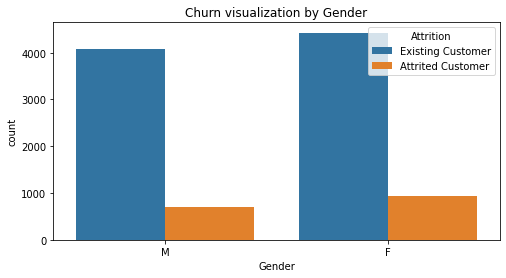

In [481]:
plt.figure(figsize=(8,4))
plt.title('Churn visualization by Gender')
sns.countplot(data=df,x='Gender',hue='Attrition')

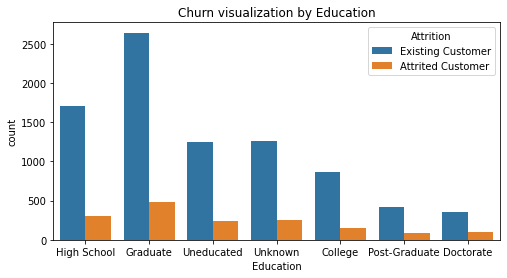

In [482]:
plt.figure(figsize=(8,4))
plt.title('Churn visualization by Education')
sns.countplot(data=df,x='Education',hue='Attrition')

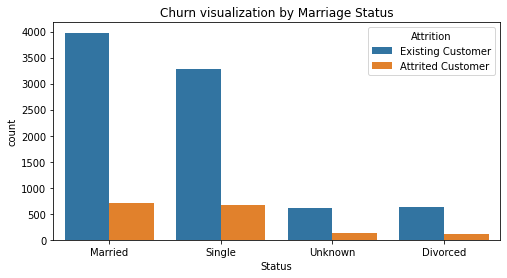

In [483]:
plt.figure(figsize=(8,4))
plt.title('Churn visualization by Marriage Status')
sns.countplot(data=df,x='Status',hue='Attrition')

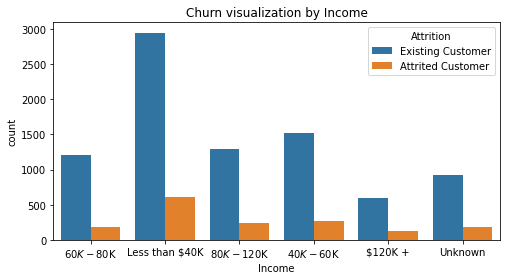

In [484]:
plt.figure(figsize=(8,4))
plt.title('Churn visualization by Income')
sns.countplot(data=df,x='Income',hue='Attrition')

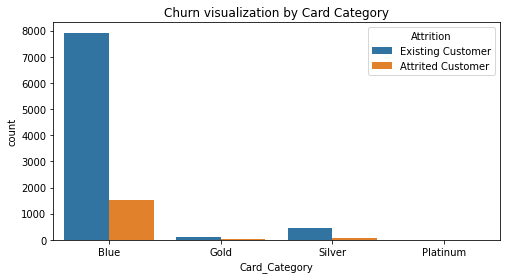

In [485]:
plt.figure(figsize=(8,4))
plt.title('Churn visualization by Card Category')
sns.countplot(data=df,x='Card_Category',hue='Attrition')

**Now we can introduce some columns with dummie variables**

In [486]:
willget_dummies = ["Gender", "Education", "Status", "Card_Category"]
df =pd.concat([df, pd.get_dummies(df[willget_dummies])], axis=1)

df.drop(willget_dummies, axis = 1,inplace=True)

In [487]:
df["Income"].replace({"Unknown" : 0,
            "Less than $40K" : 1,
            "$40K - $60K" : 2,
           "$60K - $80K" : 3,
            "$80K - $120K" : 4,
            "$120K +" : 5}, inplace = True)

In [488]:
y = df["Attrition"].replace({"Existing Customer" : 0 , 
                             "Attrited Customer" : 1})
x = df.drop(["No", "Attrition"], axis = 1)

In [489]:
x.head()

,Age,Dependent_Count,Income,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Status_Divorced,Status_Married,Status_Single,Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
1,49,5,1,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0
2,51,3,4,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,40,4,1,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0
4,40,3,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0


**Let's normalize the dataset for more accurate training**

In [490]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in x.columns:
  x[i] = scaler.fit_transform(np.array(x[i]).reshape(-1,1))
x.head()

,Age,Dependent_Count,Income,Months_on_book,Total_Relationship_Count,Months_Inactive,Contacts_Count,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Gender_F,Gender_M,Education_College,Education_Doctorate,Education_Graduate,Education_High School,Education_Post-Graduate,Education_Uneducated,Education_Unknown,Status_Divorced,Status_Married,Status_Single,Status_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,0.620039,0.384621,0.763943,-1.327136,0.492404,0.446622,-0.473422,0.488971,2.623494,-0.959707,-0.973895,3.834003,-0.775882,-1.059956,1.059956,-0.333388,-0.215894,-0.668521,2.007685,-0.231708,-0.414857,-0.420076,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794
1,0.333570,2.043199,-0.736292,1.010715,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,-0.008486,3.563293,-0.916433,-1.357340,12.608573,-0.616276,0.943436,-0.943436,-0.333388,-0.215894,1.495838,-0.498086,-0.231708,-0.414857,-0.420076,-0.282405,-0.928214,1.252337,-0.282609,0.270611,-0.107644,-0.044484,-0.240794
2,0.583058,0.503368,1.298204,0.008965,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,-0.445658,8.367214,-0.740982,-1.911206,6.807864,-0.997155,-1.059956,1.059956,-0.333388,-0.215894,1.495838,-0.498086,-0.231708,-0.414857,-0.420076,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794
3,-0.789126,1.273283,-0.736292,-0.241473,-0.522785,1.641478,-1.315636,-0.585251,1.661686,-0.734100,2.942843,-0.951758,-1.911206,6.807864,1.759686,0.943436,-0.943436,-0.333388,-0.215894,-0.668521,2.007685,-0.231708,-0.414857,-0.420076,-0.282405,-0.928214,-0.798507,3.538459,0.270611,-0.107644,-0.044484,-0.240794
4,-0.789126,0.503368,0.620039,-1.869317,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,-0.302868,6.455682,-1.056263,-1.570365,7.509325,-0.997155,-1.059956,1.059956,-0.333388,-0.215894,-0.668521,-0.498086,-0.231708,2.410468,-0.420076,-0.282405,1.077338,-0.798507,-0.282609,0.270611,-0.107644,-0.044484,-0.240794


**Splitting the data;**
*   %80 training set
*   %20 test set



In [491]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

**I am gonna train with a lot of classifiers and put them results into 1 dataframe**

In [492]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score

def evaluation(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred)
  rcl = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  auc_score = roc_auc_score(y_test,y_pred)
  prec_score = precision_score(y_test,y_pred)
 

  metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'auc score': round(auc_score,3),
               'precision': round(prec_score,3) 
              }

  return print(metric_dict)

In [493]:
Results = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

In [494]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
res = pd.DataFrame({"Model":['DecisionTreeClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred1,y_test)],
                    "Recall": [recall_score(y_test,y_pred1)],
                    "F1score": [f1_score(y_test,y_pred1)]})
Results = Results.append(res)

In [495]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)
res = pd.DataFrame({"Model":['KNeighborsClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred2,y_test)],
                    "Recall": [recall_score(y_test,y_pred2)],
                    "F1score": [f1_score(y_test,y_pred2)]})
Results = Results.append(res)

In [496]:
from sklearn import svm
svm_model = svm.SVC(kernel = "linear")
svm_model.fit(x_train, y_train)
y_pred3 = svm_model.predict(x_test)
res = pd.DataFrame({"Model":['SVC'],
                    "Accuracy Score": [accuracy_score(y_pred3,y_test)],
                    "Recall": [recall_score(y_test,y_pred3)],
                    "F1score": [f1_score(y_test,y_pred3)]})
Results = Results.append(res)

In [497]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred4 = lr.predict(x_test)
res = pd.DataFrame({"Model":['LogisticRegression'],
                    "Accuracy Score": [accuracy_score(y_pred4,y_test)],
                    "Recall": [recall_score(y_test,y_pred4)],
                    "F1score": [f1_score(y_test,y_pred4)]})
Results = Results.append(res)

In [498]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred5 = xgb.predict(x_test)
res = pd.DataFrame({"Model":['XGBClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred5,y_test)],
                    "Recall": [recall_score(y_test,y_pred5)],
                    "F1score": [f1_score(y_test,y_pred5)]})
Results = Results.append(res)

In [499]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier()
catboost.fit(x_train,y_train)
y_pred6 = catboost.predict(x_test)
res = pd.DataFrame({"Model":['CatBoostClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred6,y_test)],
                    "Recall": [recall_score(y_test,y_pred6)],
                    "F1score": [f1_score(y_test,y_pred6)]})
Results = Results.append(res)

Learning rate set to 0.02517
0:	learn: 0.6582551	total: 5.94ms	remaining: 5.93s
1:	learn: 0.6263958	total: 11.4ms	remaining: 5.68s
2:	learn: 0.5963313	total: 16.5ms	remaining: 5.48s
3:	learn: 0.5721444	total: 21.7ms	remaining: 5.4s
4:	learn: 0.5496191	total: 26.6ms	remaining: 5.3s
5:	learn: 0.5254032	total: 31.8ms	remaining: 5.27s
6:	learn: 0.4967713	total: 36.8ms	remaining: 5.22s
7:	learn: 0.4748309	total: 41.9ms	remaining: 5.19s
8:	learn: 0.4567875	total: 46.9ms	remaining: 5.17s
9:	learn: 0.4353474	total: 52.3ms	remaining: 5.18s
10:	learn: 0.4146783	total: 62.6ms	remaining: 5.63s
11:	learn: 0.4017456	total: 69.8ms	remaining: 5.75s
12:	learn: 0.3893313	total: 75.1ms	remaining: 5.7s
13:	learn: 0.3760482	total: 82.5ms	remaining: 5.81s
14:	learn: 0.3646778	total: 92.2ms	remaining: 6.06s
15:	learn: 0.3555268	total: 97.3ms	remaining: 5.98s
16:	learn: 0.3432254	total: 103ms	remaining: 5.94s
17:	learn: 0.3335134	total: 108ms	remaining: 5.88s
18:	learn: 0.3254782	total: 113ms	remaining: 5.82s

In [500]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred7 = nb.predict(x_test)
res = pd.DataFrame({"Model":['GaussianNB'],
                    "Accuracy Score": [accuracy_score(y_pred7,y_test)],
                    "Recall": [recall_score(y_test,y_pred7)],
                    "F1score": [f1_score(y_test,y_pred7)]})
Results = Results.append(res)

In [501]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)
y_pred8 = lgbm.predict(x_test)
res = pd.DataFrame({"Model":['LGBMClassifier'],
                    "Accuracy Score": [accuracy_score(y_pred8,y_test)],
                    "Recall": [recall_score(y_test,y_pred8)],
                    "F1score": [f1_score(y_test,y_pred8)]})
Results = Results.append(res)

In [502]:
Results

,Model,Accuracy Score,Recall,F1score
0,DecisionTreeClassifier,0.932873,0.786408,0.781350
0,KNeighborsClassifier,0.887463,0.391586,0.514894
0,SVC,0.904738,0.585761,0.652252
0,LogisticRegression,0.906219,0.592233,0.658273
0,XGBClassifier,0.966436,0.844660,0.884746
0,CatBoostClassifier,0.973346,0.883495,0.910000
0,GaussianNB,0.880553,0.614887,0.610932
0,LGBMClassifier,0.976308,0.889968,0.919732


In [504]:
Results.sort_values(by='Accuracy Score',ascending=False)

,Model,Accuracy Score,Recall,F1score
0,LGBMClassifier,0.976308,0.889968,0.919732
0,CatBoostClassifier,0.973346,0.883495,0.910000
0,XGBClassifier,0.966436,0.844660,0.884746
0,DecisionTreeClassifier,0.932873,0.786408,0.781350
0,LogisticRegression,0.906219,0.592233,0.658273
0,SVC,0.904738,0.585761,0.652252
0,KNeighborsClassifier,0.887463,0.391586,0.514894
0,GaussianNB,0.880553,0.614887,0.610932




*   **WE GOT %97,63 ACCURACY WITH CATBOOST CLASSIFIER**
*   **WE GOT %97,33 ACCURACY WITH CATBOOST CLASSIFIER**

*   **LETS DO HYPERPARAMETER TUNING TO THESE TWO CLASSIFIERS SEE WHAT WILL IT DO**




FIRST CATBOOST TO TUNE

In [505]:
from sklearn.model_selection import GridSearchCV

catboost_params1 = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}
catboost_params2 = {"iterations" : [200, 500],
                    "learning_rate" : [0.01, 0.5, 0.1],
                    "depth" : [3, 5, 8]}
catboost_cv1 = GridSearchCV(estimator = catboost, 
                           param_grid = catboost_params1,
                            n_jobs=-1,
                            verbose=2,
                           cv=5)

catboost_cv2 = GridSearchCV(estimator = catboost, 
                           param_grid = catboost_params2,
                            n_jobs=-1,
                            verbose=2,
                           cv=5)

In [506]:
catboost_cv1.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   39.3s finished


Learning rate set to 0.075921
0:	learn: 0.6015536	total: 8.16ms	remaining: 2.44s
1:	learn: 0.5267678	total: 14.2ms	remaining: 2.12s
2:	learn: 0.4660558	total: 20.8ms	remaining: 2.06s
3:	learn: 0.4232085	total: 28.6ms	remaining: 2.12s
4:	learn: 0.3850930	total: 36.5ms	remaining: 2.16s
5:	learn: 0.3424567	total: 46.3ms	remaining: 2.27s
6:	learn: 0.3148274	total: 52.1ms	remaining: 2.18s
7:	learn: 0.2929272	total: 56.6ms	remaining: 2.07s
8:	learn: 0.2788204	total: 60.6ms	remaining: 1.96s
9:	learn: 0.2646887	total: 68.8ms	remaining: 1.99s
10:	learn: 0.2541279	total: 72.8ms	remaining: 1.91s
11:	learn: 0.2459718	total: 77.1ms	remaining: 1.85s
12:	learn: 0.2364175	total: 81.1ms	remaining: 1.79s
13:	learn: 0.2287564	total: 85.1ms	remaining: 1.74s
14:	learn: 0.2224145	total: 89.1ms	remaining: 1.69s
15:	learn: 0.2164214	total: 93ms	remaining: 1.65s
16:	learn: 0.2118056	total: 96.8ms	remaining: 1.61s
17:	learn: 0.2038288	total: 101ms	remaining: 1.58s
18:	learn: 0.1961826	total: 105ms	remaining: 1.

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f7d12d5bc90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [508]:
catboost_cv2.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  3.6min finished


0:	learn: 0.5754580	total: 4.36ms	remaining: 2.17s
1:	learn: 0.4866095	total: 8.51ms	remaining: 2.12s
2:	learn: 0.4214880	total: 12.4ms	remaining: 2.06s
3:	learn: 0.3740280	total: 16.3ms	remaining: 2.03s
4:	learn: 0.3387365	total: 20.2ms	remaining: 2s
5:	learn: 0.3008814	total: 24.1ms	remaining: 1.99s
6:	learn: 0.2822242	total: 28ms	remaining: 1.97s
7:	learn: 0.2560663	total: 31.9ms	remaining: 1.96s
8:	learn: 0.2436066	total: 35.8ms	remaining: 1.95s
9:	learn: 0.2351424	total: 39.7ms	remaining: 1.95s
10:	learn: 0.2227852	total: 43.7ms	remaining: 1.94s
11:	learn: 0.2160947	total: 47.6ms	remaining: 1.94s
12:	learn: 0.2082347	total: 51.8ms	remaining: 1.94s
13:	learn: 0.2034248	total: 55.9ms	remaining: 1.94s
14:	learn: 0.1909526	total: 59.8ms	remaining: 1.93s
15:	learn: 0.1864926	total: 63.8ms	remaining: 1.93s
16:	learn: 0.1774844	total: 67.8ms	remaining: 1.93s
17:	learn: 0.1735111	total: 72.5ms	remaining: 1.94s
18:	learn: 0.1705345	total: 77.8ms	remaining: 1.97s
19:	learn: 0.1666514	total:

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f7d12d5bc90>,
             iid='deprecated', n_jobs=-1,
             param_grid={'depth': [3, 5, 8], 'iterations': [200, 500],
                         'learning_rate': [0.01, 0.5, 0.1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [509]:
print("Best parameters are {} for parameters 1".format(catboost_cv1.best_params_))
print("Best parameters are {} for parameters 2".format(catboost_cv2.best_params_))

Best parameters are {'max_depth': 5, 'n_estimators': 300} for parameters 1
Best parameters are {'depth': 5, 'iterations': 500, 'learning_rate': 0.1} for parameters 2


In [510]:
tuned_df = pd.DataFrame({'Model': [],'Accuracy Score': [], 'Recall':[], 'F1score':[]})

In [511]:
catboost_tuned_1 = CatBoostClassifier(max_depth =  5, n_estimators= 300)
catboost_tuned_1.fit(x_train,y_train)
catboost_tuned_1_pred = catboost_tuned_1.predict(x_test)
res = pd.DataFrame({"Model":['CatBoostClassifier-1'],
                    "Accuracy Score": [accuracy_score(catboost_tuned_1_pred,y_test)],
                    "Recall": [recall_score(y_test,catboost_tuned_1_pred)],
                    "F1score": [f1_score(y_test,catboost_tuned_1_pred)]})
tuned_df = tuned_df.append(res)

Learning rate set to 0.075921
0:	learn: 0.6015536	total: 4.2ms	remaining: 1.26s
1:	learn: 0.5267678	total: 8.2ms	remaining: 1.22s
2:	learn: 0.4660558	total: 12.4ms	remaining: 1.23s
3:	learn: 0.4232085	total: 16.7ms	remaining: 1.24s
4:	learn: 0.3850930	total: 21.1ms	remaining: 1.25s
5:	learn: 0.3424567	total: 25.5ms	remaining: 1.25s
6:	learn: 0.3148274	total: 29.7ms	remaining: 1.24s
7:	learn: 0.2929272	total: 34.3ms	remaining: 1.25s
8:	learn: 0.2788204	total: 38.5ms	remaining: 1.24s
9:	learn: 0.2646887	total: 43ms	remaining: 1.25s
10:	learn: 0.2541279	total: 47.7ms	remaining: 1.25s
11:	learn: 0.2459718	total: 51.9ms	remaining: 1.25s
12:	learn: 0.2364175	total: 56.7ms	remaining: 1.25s
13:	learn: 0.2287564	total: 61.1ms	remaining: 1.25s
14:	learn: 0.2224145	total: 65.4ms	remaining: 1.24s
15:	learn: 0.2164214	total: 69.4ms	remaining: 1.23s
16:	learn: 0.2118056	total: 73.6ms	remaining: 1.23s
17:	learn: 0.2038288	total: 78ms	remaining: 1.22s
18:	learn: 0.1961826	total: 82.4ms	remaining: 1.22

In [512]:
catboost_tuned_2 = CatBoostClassifier(depth= 5, iterations= 500, learning_rate= 0.1)
catboost_tuned_2.fit(x_train,y_train)
catboost_tuned_2_pred = catboost_tuned_2.predict(x_test)
res = pd.DataFrame({"Model":['CatBoostClassifier-2'],
                    "Accuracy Score": [accuracy_score(catboost_tuned_2_pred,y_test)],
                    "Recall": [recall_score(y_test,catboost_tuned_2_pred)],
                    "F1score": [f1_score(y_test,catboost_tuned_2_pred)]})
tuned_df = tuned_df.append(res)

0:	learn: 0.5754580	total: 4.08ms	remaining: 2.04s
1:	learn: 0.4866095	total: 8.17ms	remaining: 2.03s
2:	learn: 0.4214880	total: 12.1ms	remaining: 2s
3:	learn: 0.3740280	total: 16.4ms	remaining: 2.03s
4:	learn: 0.3387365	total: 20.9ms	remaining: 2.07s
5:	learn: 0.3008814	total: 25.3ms	remaining: 2.08s
6:	learn: 0.2822242	total: 29.5ms	remaining: 2.07s
7:	learn: 0.2560663	total: 33.8ms	remaining: 2.08s
8:	learn: 0.2436066	total: 38.3ms	remaining: 2.09s
9:	learn: 0.2351424	total: 43.6ms	remaining: 2.13s
10:	learn: 0.2227852	total: 47.8ms	remaining: 2.13s
11:	learn: 0.2160947	total: 52.2ms	remaining: 2.12s
12:	learn: 0.2082347	total: 56.6ms	remaining: 2.12s
13:	learn: 0.2034248	total: 63.6ms	remaining: 2.21s
14:	learn: 0.1909526	total: 73.8ms	remaining: 2.39s
15:	learn: 0.1864926	total: 78.2ms	remaining: 2.36s
16:	learn: 0.1774844	total: 82.6ms	remaining: 2.35s
17:	learn: 0.1735111	total: 86.8ms	remaining: 2.33s
18:	learn: 0.1705345	total: 90.9ms	remaining: 2.3s
19:	learn: 0.1666514	total

In [513]:
tuned_df

,Model,Accuracy Score,Recall,F1score
0,CatBoostClassifier-1,0.971866,0.873786,0.904523
0,CatBoostClassifier-2,0.972359,0.880259,0.906667


I am not gonna Tune LightGBM because its accuracy is more than enough. Tuned CatBoost could not reach that.

In [518]:
Results = pd.concat([Results, tuned_df])
Results = Results.sort_values(by='Accuracy Score',ascending=False)
Results

,Model,Accuracy Score,Recall,F1score
0,LGBMClassifier,0.976308,0.889968,0.919732
0,CatBoostClassifier,0.973346,0.883495,0.910000
0,CatBoostClassifier-2,0.972359,0.880259,0.906667
0,CatBoostClassifier-1,0.971866,0.873786,0.904523
0,XGBClassifier,0.966436,0.844660,0.884746
0,DecisionTreeClassifier,0.932873,0.786408,0.781350
0,LogisticRegression,0.906219,0.592233,0.658273
0,SVC,0.904738,0.585761,0.652252
0,KNeighborsClassifier,0.887463,0.391586,0.514894
0,GaussianNB,0.880553,0.614887,0.610932


In [519]:
from sklearn.metrics import classification_report,plot_confusion_matrix,plot_roc_curve

model = LGBMClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("We had the best scores with LightGBM Classifier:") 
evaluation(y_test,y_pred)

We had the best scores with LightGBM Classifier:
{'accuracy': 0.976, 'recall': 0.89, 'F1 score': 0.92, 'auc score': 0.941, 'precision': 0.952}


In [520]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1717
           1       0.95      0.89      0.92       309

    accuracy                           0.98      2026
   macro avg       0.97      0.94      0.95      2026
weighted avg       0.98      0.98      0.98      2026



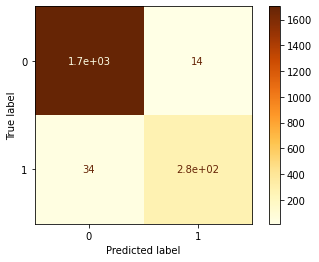

In [522]:
plot_confusion_matrix(model,x_test,y_test,cmap='YlOrBr')

**AS A FINAL WORDS; WE GOT 0.98 ACCURACY WITH LIGHTGM CLASSIFIER**